# Índice de Precios de Vivienda (IPV)
El Índice de Precios de Vivienda (IPV) tiene como objetivo la medición de la evolución de los precios de compraventa de las viviendas de precio libre, tanto nuevas como de segunda mano, a lo largo del tiempo.  
La fuente de información utilizada procede de las bases de datos sobre viviendas escrituradas que proporciona el Consejo General del Notariado, de donde se obtienen los precios de transacción de las viviendas, así como las ponderaciones que se asignan a cada conjunto de viviendas con características comunes.  

El proceso de diseño y desarrollo del IPV se ha realizado de forma simultánea con el del HPI, indicador de vivienda armonizado de la Unión Europea, coordinado por la Oficina de Estadística de la Unión Europea (Eurostat).
El IPV y el HPI se diferencian en dos aspectos técnicos: por un lado, el periodo de referencia de las ponderaciones es el año previo al corriente, en el caso del HPI, mientras que el IPV utiliza los dos años anteriores para su cálculo. Por otro, el HPI incorpora el IVA en el precio de la vivienda nueva y el IPV no lo incluye.  

**Fuente:** https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736152838&menu=ultiDatos&idp=1254735976607

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# Cargar datos de Índices por CCAA: general, vivienda nueva y de segunda mano
df = pd.read_csv("IPV.csv", sep=";", usecols=[1,2,3,4,5]) # prescindir índice 0 por tomar un solo valor 'nacional'
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.sort_values("periodo", ascending=False).head()

,comunidades_y_ciudades_autónomas,"general,_vivienda_nueva_y_de_segunda_mano",índices_y_tasas,periodo,total
0,NaN,General,Índice,2024T4,"165,433"
5616,06 Cantabria,Vivienda nueva,Variación anual,2024T4,"13,2"
6480,07 Castilla y León,Vivienda nueva,Variación anual,2024T4,"10,8"
6408,07 Castilla y León,Vivienda nueva,Variación trimestral,2024T4,"3,6"
6336,07 Castilla y León,Vivienda nueva,Índice,2024T4,"169,777"


## Preprocesamiento

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   comunidades_y_ciudades_autónomas           16416 non-null  object
 1   general,_vivienda_nueva_y_de_segunda_mano  17280 non-null  object
 2   índices_y_tasas                            17280 non-null  object
 3   periodo                                    17280 non-null  object
 4   total                                      16128 non-null  object
dtypes: object(5)
memory usage: 675.1+ KB


In [4]:
# Renombrar columna
df = df.rename(columns={"general,_vivienda_nueva_y_de_segunda_mano": "tipo_vivienda"})
# Conocer composición de cada columna
for col in df.columns:
    print(f"--- Categoría de {col}: ---\n", df[col].unique(), "\n")

--- Categoría de comunidades_y_ciudades_autónomas: ---
 [nan '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla'] 

--- Categoría de tipo_vivienda: ---
 ['General' 'Vivienda nueva' 'Vivienda segunda mano'] 

--- Categoría de índices_y_tasas: ---
 ['Índice' 'Variación trimestral' 'Variación anual'
 'Variación en lo que va de año'] 

--- Categoría de periodo: ---
 ['2024T4' '2024T3' '2024T2' '2024T1' '2023T4' '2023T3' '2023T2' '2023T1'
 '2022T4' '2022T3' '2022T2' '2022T1' '2021T4' '2021T3' '2021T2' '2021T1'
 '2020T4' '2020T3' '2020T2' '2020T1' '2019T4' '2019T3' '2019T2' '2019T1'
 '2018T4' '2018T3' '2018T2' '2018T1' '2017T4' '2017T3' '2017T2' '2017T1'
 '2016T4' '2016T3' '2016T2' '20

### Eliminar filas con valores nulos

In [5]:
df = df.dropna(subset=["total", "comunidades_y_ciudades_autónomas"])
df.shape

(15264, 5)

### Convertir columna total a numérica

In [6]:
df.total = df.total.str.replace(",", ".")
df.total = pd.to_numeric(df.total)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15264 entries, 864 to 16703
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   comunidades_y_ciudades_autónomas  15264 non-null  object 
 1   tipo_vivienda                     15264 non-null  object 
 2   índices_y_tasas                   15264 non-null  object 
 3   periodo                           15264 non-null  object 
 4   total                             15264 non-null  float64
dtypes: float64(1), object(4)
memory usage: 715.5+ KB


### Convertir columna de fecha

In [8]:
df["periodo"] = df["periodo"].str.replace("T", "Q")
df["periodo"] = pd.PeriodIndex(df["periodo"], freq="Q")

In [9]:
df["periodo"].unique()

<PeriodArray>
['2024Q4', '2024Q3', '2024Q2', '2024Q1', '2023Q4', '2023Q3', '2023Q2',
 '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3',
 '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4',
 '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1',
 '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2',
 '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3',
 '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4',
 '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1',
 '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2',
 '2009Q1', '2008Q4', '2008Q3', '2008Q2', '2008Q1', '2007Q4', '2007Q3',
 '2007Q2', '2007Q1']
Length: 72, dtype: period[Q-DEC]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15264 entries, 864 to 16703
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype        
---  ------                            --------------  -----        
 0   comunidades_y_ciudades_autónomas  15264 non-null  object       
 1   tipo_vivienda                     15264 non-null  object       
 2   índices_y_tasas                   15264 non-null  object       
 3   periodo                           15264 non-null  period[Q-DEC]
 4   total                             15264 non-null  float64      
dtypes: float64(1), object(3), period[Q-DEC](1)
memory usage: 715.5+ KB


### Acortar nombres de comunidades

In [11]:
df = df.assign(comunidades = df.comunidades_y_ciudades_autónomas.apply(lambda x: x.split(" ")[1] if len(x.split(" ")) <= 2 else x.split(" ")[1].rstrip(",")))

### Eliminar columna con nombre completo de comunidades

In [12]:
df = df.drop(columns='comunidades_y_ciudades_autónomas')

## Gráficos

In [13]:
data = df.copy()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15264 entries, 864 to 16703
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   tipo_vivienda    15264 non-null  object       
 1   índices_y_tasas  15264 non-null  object       
 2   periodo          15264 non-null  period[Q-DEC]
 3   total            15264 non-null  float64      
 4   comunidades      15264 non-null  object       
dtypes: float64(1), object(3), period[Q-DEC](1)
memory usage: 715.5+ KB


In [15]:
data.head()

,tipo_vivienda,índices_y_tasas,periodo,total,comunidades
864,General,Índice,2024Q4,165.457,Andalucía
865,General,Índice,2024Q3,162.275,Andalucía
866,General,Índice,2024Q2,156.273,Andalucía
867,General,Índice,2024Q1,149.880,Andalucía
868,General,Índice,2023Q4,145.927,Andalucía


In [16]:
# variables comunes a todos los gráficos
heading_fontsize = 11
heading_fontweight = 'bold'
subheading_fontsize = 10
subheading_fontweight = 'normal'
source_fontsize = 7
source_fontweight = 'light'

### Gráfico 1: Variaciones del Índice de Precios de Vivienda en Andalucía (2007-2024)

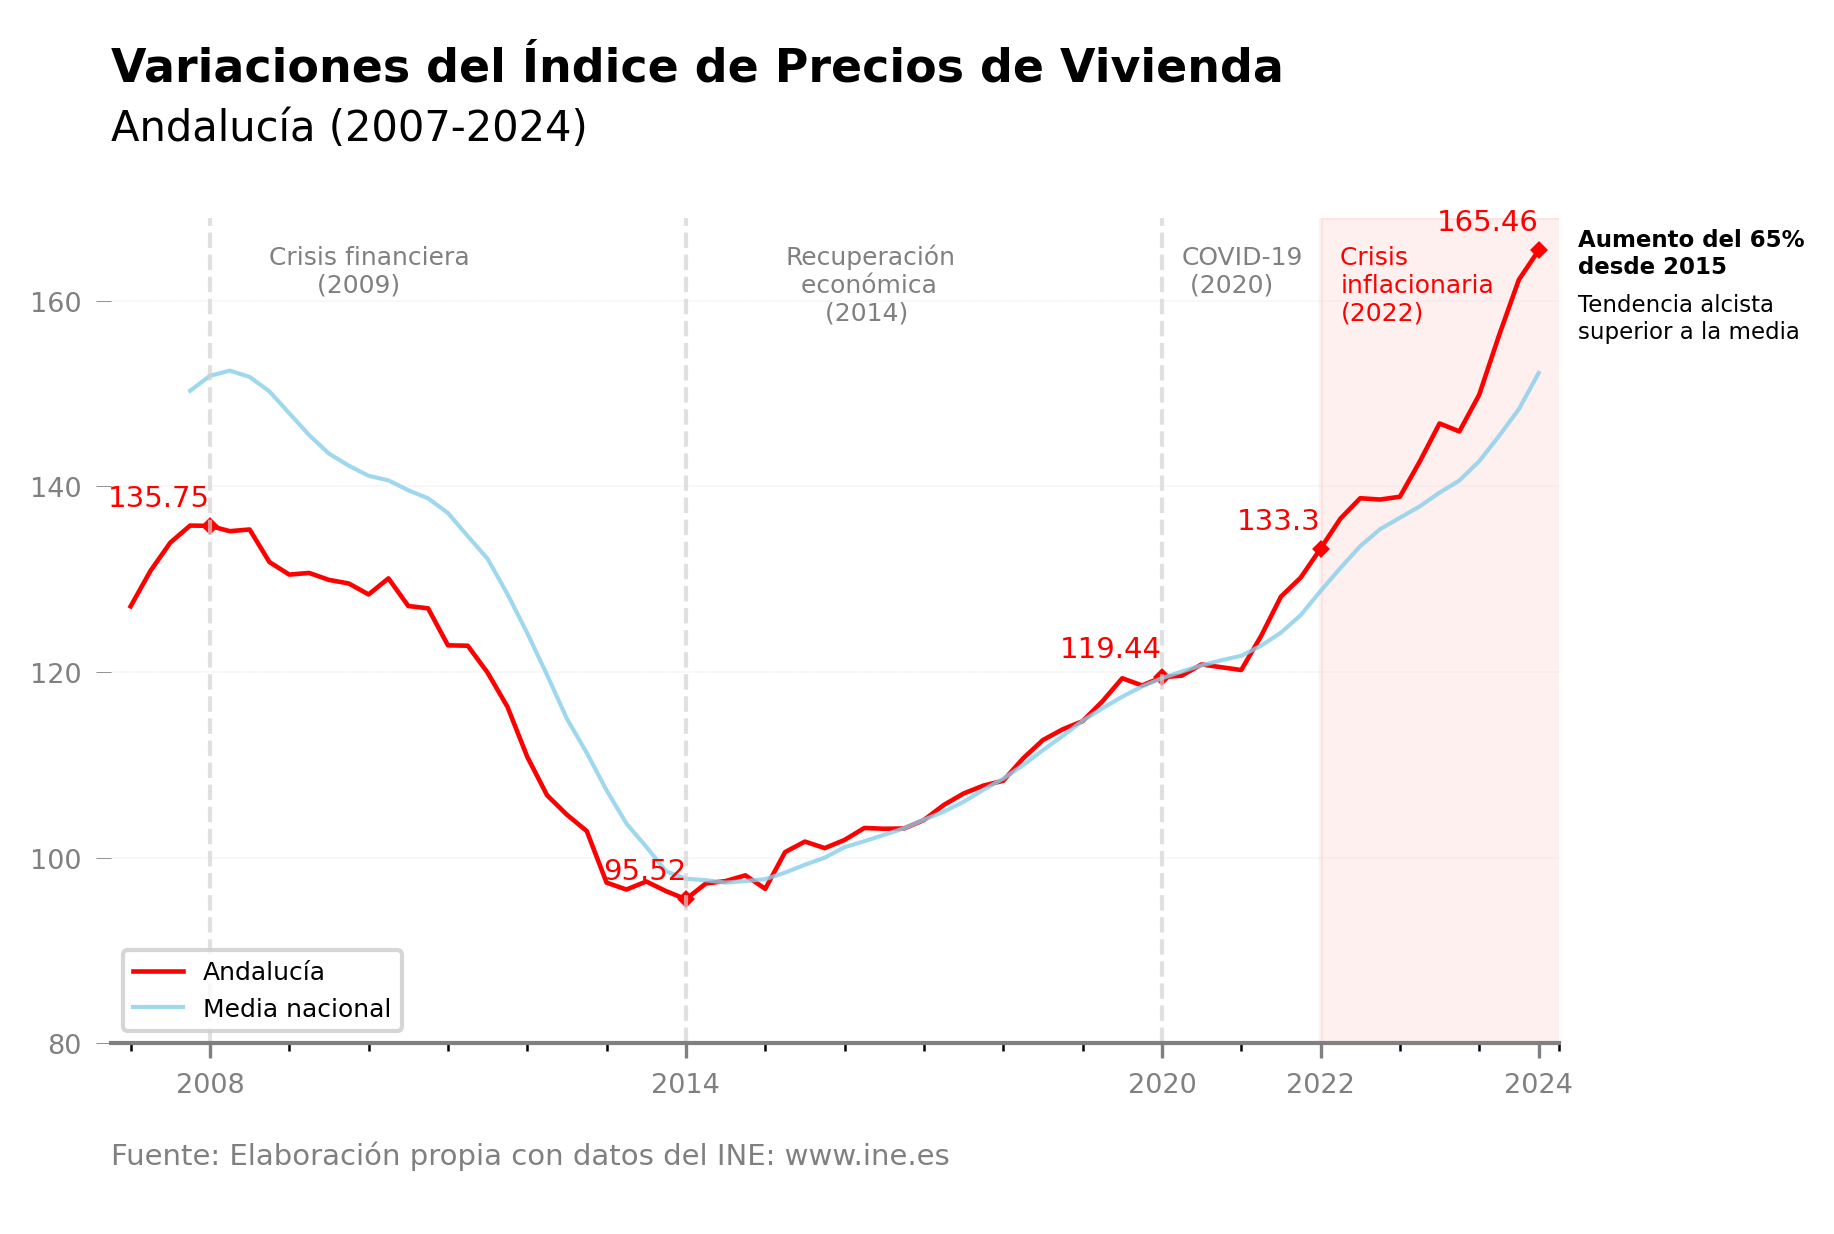

In [17]:
from highlight_text import ax_text

# Filtrar datos a utilizar
data_plot_1 = data[(data.tipo_vivienda == 'General') & (data.índices_y_tasas == 'Índice')]

# Configurar layout
layout = [['title'], ['plot'], ['notes']]
fig, axs = plt.subplot_mosaic(layout, figsize=(6, 4), dpi=300, gridspec_kw={'height_ratios': [2, 12, 1]}, constrained_layout=True)

# ----- TÍTULO -----
ax_title = axs['title']
ax_title.axis('off')
ax_text(
    s='<Variaciones del Índice de Precios de Vivienda>\n<Andalucía (2007-2024)>',
    x=0, y=1, fontsize=10, ax=ax_title, va='top', ha='left',
    highlight_textprops=[{'fontsize': heading_fontsize, 'fontweight': heading_fontweight},
                         {'fontsize': subheading_fontsize, 'fontweight': subheading_fontweight}]
)

# ----- GRÁFICO -----
ax_plot = axs['plot']


# Graficar línea de precios de Andalucía
andalucia = (data_plot_1[data_plot_1.comunidades == 'Andalucía']
             .pivot_table(index='periodo', columns='comunidades', values='total'))
andalucia.plot(ax=ax_plot, color='red', linewidth=1.1, label='Andalucía')

# Crear máscara para filtrar y graficar valores relevantes en línea de Andalucía
mask = ((andalucia.index.year.isin([2008, 2014, 2020, 2022])) & (andalucia.index.quarter == 1)) | (andalucia.index == '2024Q4')
# Graficar los puntos seleccionados
ax_plot.plot(andalucia.index[mask], andalucia[mask], 'D', color='red', markersize=2)
# Agregar las etiquetas de texto en los puntos correspondientes
for idx in andalucia.index[mask]:
    y_value = float(andalucia.loc[idx].iloc[0])
    ax_plot.text(idx, y_value + 1.5, round(y_value, 2), fontsize=7, color='red', ha='right', va='bottom')


# Graficar línea de la media nacional (sin Andalucía) con suavizado (rolling mean)
comunities_mean = (data_plot_1[data_plot_1.comunidades != 'Andalucía']
                    .groupby('periodo')['total']
                    .mean()
                    .rolling(4).mean())
comunities_mean.plot(ax=ax_plot, color='#87CEEB', linewidth=1, alpha=0.8, label='Media nacional')


# Identificar eventos históricos  
fechas = [dt(2008, 1, 1), dt(2014, 1, 1), dt(2020, 1, 1)]
for fecha in fechas:
        ax_plot.axvline(x=fecha, color='lightgray', linestyle='--', alpha=0.7, linewidth=1)

# Agregar nombre de cada evento
ax_plot.text(x=dt(2008, 11, 1), y=161, s='Crisis financiera\n      (2009)', fontsize=6, color='gray')
ax_plot.text(x=dt(2015, 4, 1), y=158, s='Recuperación\n  económica \n     (2014)', fontsize=6, color='gray')
ax_plot.text(x=dt(2020, 4, 1), y=161, s='COVID-19\n (2020)', fontsize=6, color='gray')
ax_plot.text(x=dt(2022, 4, 1), y=158, s='Crisis \ninflacionaria\n(2022)', fontsize=6, color='red')
ax_plot.text(x=dt(2025, 4, 1), y=156, s='Tendencia alcista \nsuperior a la media', fontsize=5.5, color='black')
ax_plot.text(x=dt(2025, 4, 1), y=163, s='Aumento del 65%\ndesde 2015', fontsize=5.5, color='black', fontweight='bold')

# Sombrear periodo inflacionario (2022 en adelante)
ax_plot.axvspan('2022Q1', '2025Q4', color='red', alpha=0.06)  # Sombrea desde 2022 hasta la fecha


# Personalizar ejes
ax_plot.set_xticks(andalucia.index[mask]) # Establecer los major ticks en el eje X a las fechas seleccionadas
ax_plot.set_xticklabels([str(year) for year in andalucia.index.year[mask]]) # Establecer las etiquetas de los major ticks a los años correspondientes
ax_plot.set_xlabel('')
ax_plot.set_xlim('2006Q4', '2025Q1')
ax_plot.set_yticks(np.arange(80, 170, 20))
ax_plot.set_yticklabels([str(i) for i in np.arange(80, 170, 20)])
ax_plot.tick_params(axis='x', colors='gray', labelsize=6.5)
ax_plot.tick_params(axis='y', colors='gray', labelsize=6.5, width=0.2)
[ax_plot.spines[side].set_visible(False) for side in ['top', 'right', 'left']]
ax_plot.spines[['bottom']].set_color('gray')
ax_plot.spines[['bottom']].set_linewidth(1)

# Agregar líneas de la grilla al eje y
ax_plot.grid(which='major', axis='y', linestyle='--', color='lightgray', linewidth=0.1)


# ----- FUENTE -----
ax_notes = axs['notes']
ax_notes.axis('off')
ax_text(s='Fuente: Elaboración propia con datos del INE: www.ine.es', 
        x=0, y=.5, fontsize=source_fontsize, fontweight=source_fontweight, ax=ax_notes, ha='left', va='bottom', color='gray')

# Agregar leyenda y mostrar gráfico
ax_plot.legend(fontsize=6, loc='lower left')
plt.savefig('ipv_andalucia.png', dpi=300)
plt.show()

### Gráfico 2: Impulso del mercado Adaluz - Variación trimestral y superación de la media nacional (2022-2024)

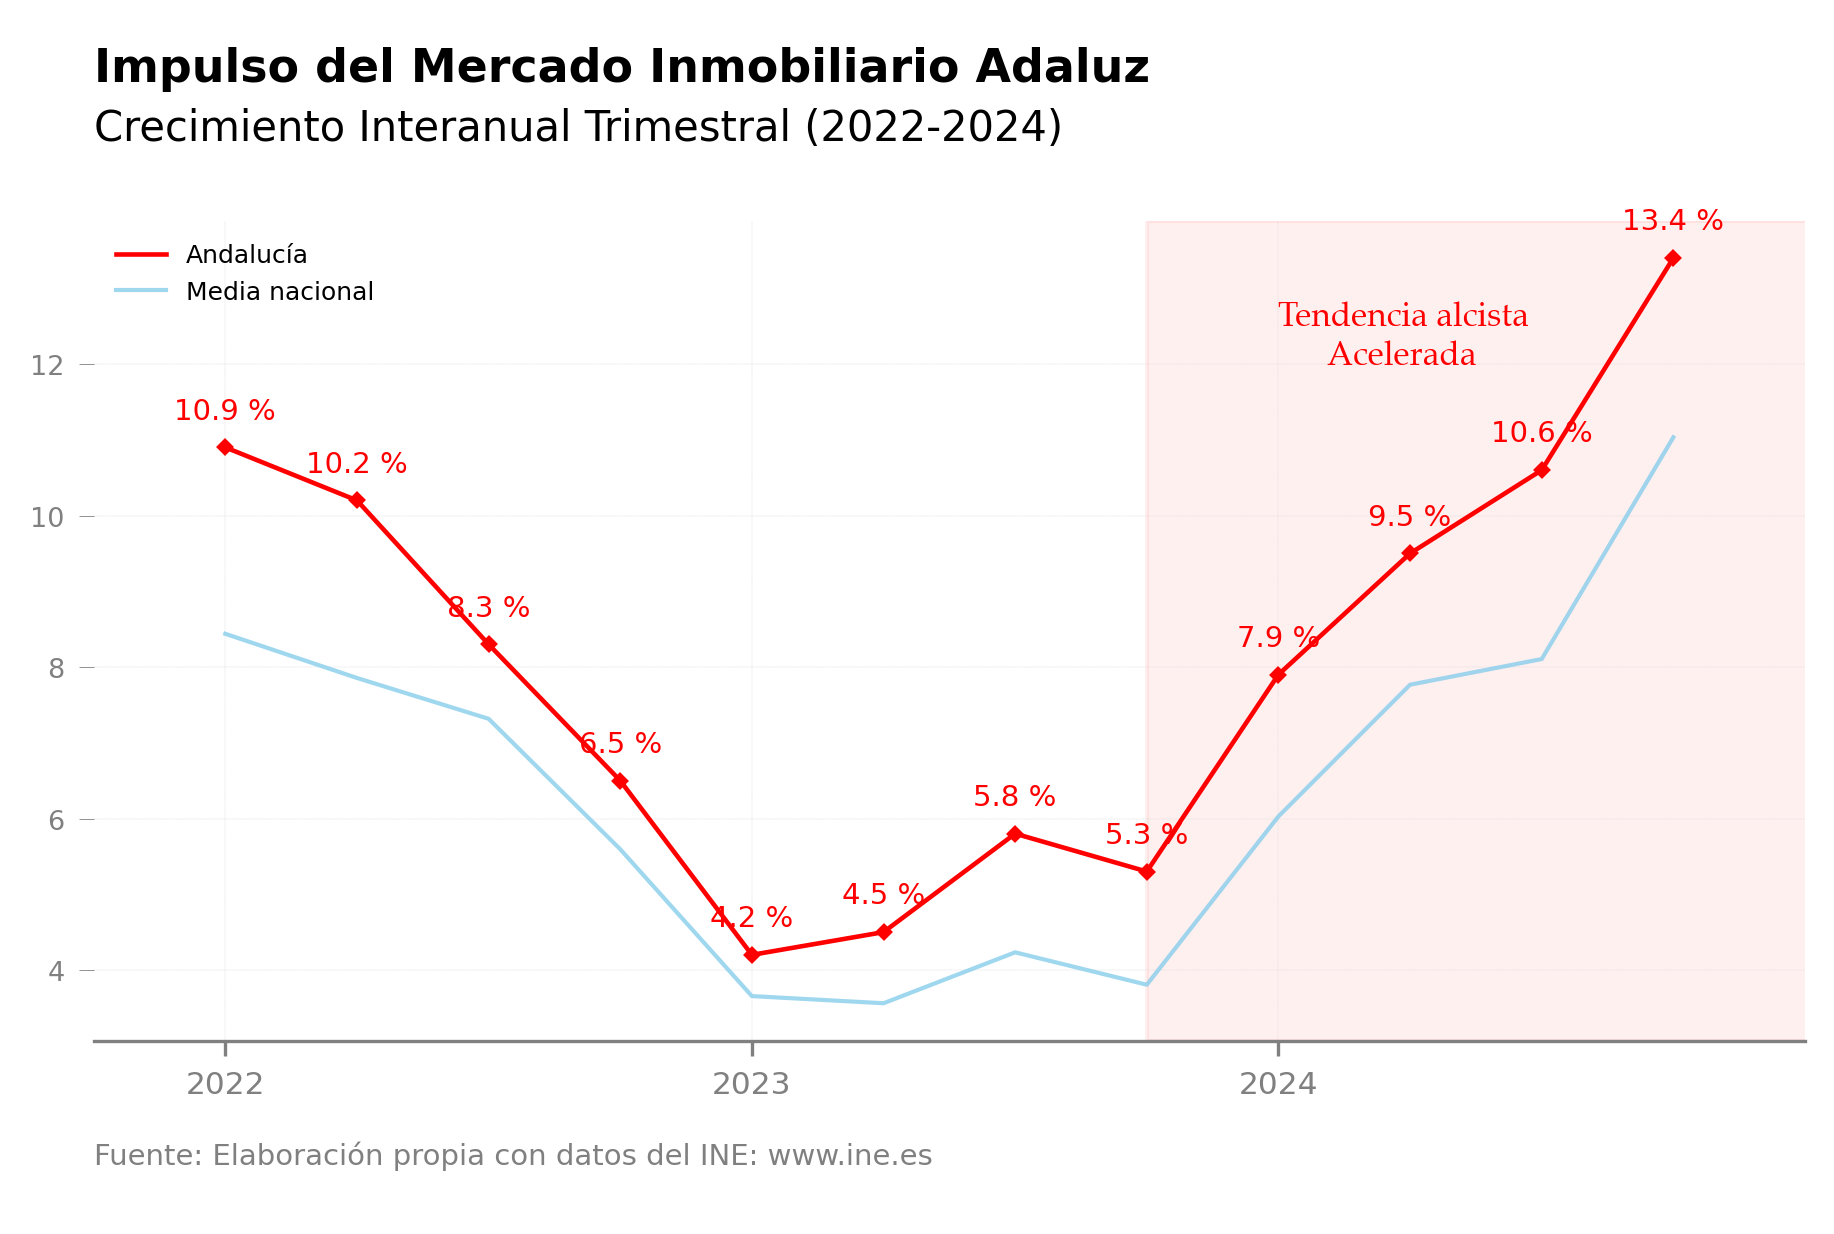

In [20]:
from highlight_text import ax_text

# Filtrar datos
data_plot_2 = data[(data.periodo >= '2022Q1') & (data.índices_y_tasas == 'Variación anual') & (data.tipo_vivienda == 'General')]

# Configurar layout
layout2 = [['title'], ['plot'], ['notes']]
fig2, axs2 = plt.subplot_mosaic(layout2, figsize=(6, 4), dpi=300, gridspec_kw={'height_ratios': [2, 12, 1]}, constrained_layout=True)

# ----- TÍTULO -----
ax_title2 = axs2['title']
ax_title2.axis('off')
ax_text(
    s='<Impulso del Mercado Inmobiliario Adaluz>\n<Crecimiento Interanual Trimestral (2022-2024)>',
    x=0, y=1, fontsize=10, ax=ax_title2, va='top', ha='left',
    highlight_textprops=[{'fontsize': heading_fontsize, 'fontweight': heading_fontweight},
                         {'fontsize': subheading_fontsize, 'fontweight': subheading_fontweight}]
)

# ----- GRÁFICO -----
ax_plot2 = axs2['plot']

# Graficar línea de Andalucía
andalucia_data = data_plot_2[data_plot_2.comunidades == 'Andalucía'].pivot_table(index='periodo', columns='comunidades', values='total')
andalucia_data.plot(legend=False, ax=ax_plot2, color='red', linewidth=1.1)

# Graficar línea de la media nacional (sin Andalucía)
national_mean = (data_plot_2[data_plot_2.comunidades != 'Andalucía']
                    .groupby('periodo')['total']
                    .mean())
national_mean.plot(ax=ax_plot2, color='#87CEEB', linewidth=1, alpha=0.8, label='Media nacional')

# Graficar valores en la línea
ax_plot2.plot(andalucia_data.index, andalucia_data.values, 'D', color='red', markersize=2)
# Agregar las etiquetas de texto en los puntos correspondientes
for x, y in zip(andalucia_data.index, andalucia_data.values):
    ax_plot2.text(x, y + 0.3, f'{y[0]} %', fontsize=7, color='red', ha='center', va='bottom')

# Sombrear periodo de comienzo de aumento sostenido de los precios
ax_plot2.axvspan('2023Q4', '2025Q4', color='red', alpha=0.06)
ax_plot2.text(x=dt(2024, 1, 1), y=12, s='Tendencia alcista \n      Acelerada', fontsize=8, color='red', fontfamily='palatino')

# Personalizar ejes
x_mask = ((andalucia_data.index.year.isin([2022, 2023, 2024])) & (andalucia_data.index.quarter == 1))
ax_plot2.set_xticks(andalucia_data.index[x_mask]) # Establecer los major ticks en el eje X a las fechas seleccionadas
ax_plot2.set_xticklabels([str(year) for year in andalucia_data.index.year[x_mask]])
ax_plot2.set_xlabel('')
ax_plot2.set_xlim('2021Q4', '2025Q1')
ax_plot2.minorticks_off()
ax_plot2.tick_params(axis='x', colors='gray', labelsize=7.5)
ax_plot2.tick_params(axis='y', colors='gray', labelsize=6.5, width=0.2)
[ax_plot2.spines[side].set_visible(False) for side in ['top', 'right', 'left']]
ax_plot2.spines[['bottom', 'left']].set_color('gray')

# Agregar líneas de la grilla al eje x e y
ax_plot2.grid(which='major', axis='y', linestyle='--', color='lightgray', linewidth=0.1)
ax_plot2.grid(which='major', axis='x', linestyle='--', color='lightgray', linewidth=0.1)

# ----- FUENTE -----
ax_notes2 = axs2['notes']
ax_notes2.axis('off')
ax_text(s='Fuente: Elaboración propia con datos del INE: www.ine.es', 
        x=0, y=.5, fontsize=source_fontsize, fontweight=source_fontweight, ax=ax_notes2, ha='left', va='bottom', color='gray')

# Agregar leyenda y mostrar gráfico
ax_plot2.legend(fontsize=6, loc='upper left', frameon=False)
plt.savefig('mercado_andaluz.png', dpi=300)
plt.show()

### Gráfico 3: Variacion interanual trimestral según Tipo de Vivienda - Andalucía (2022-2024)

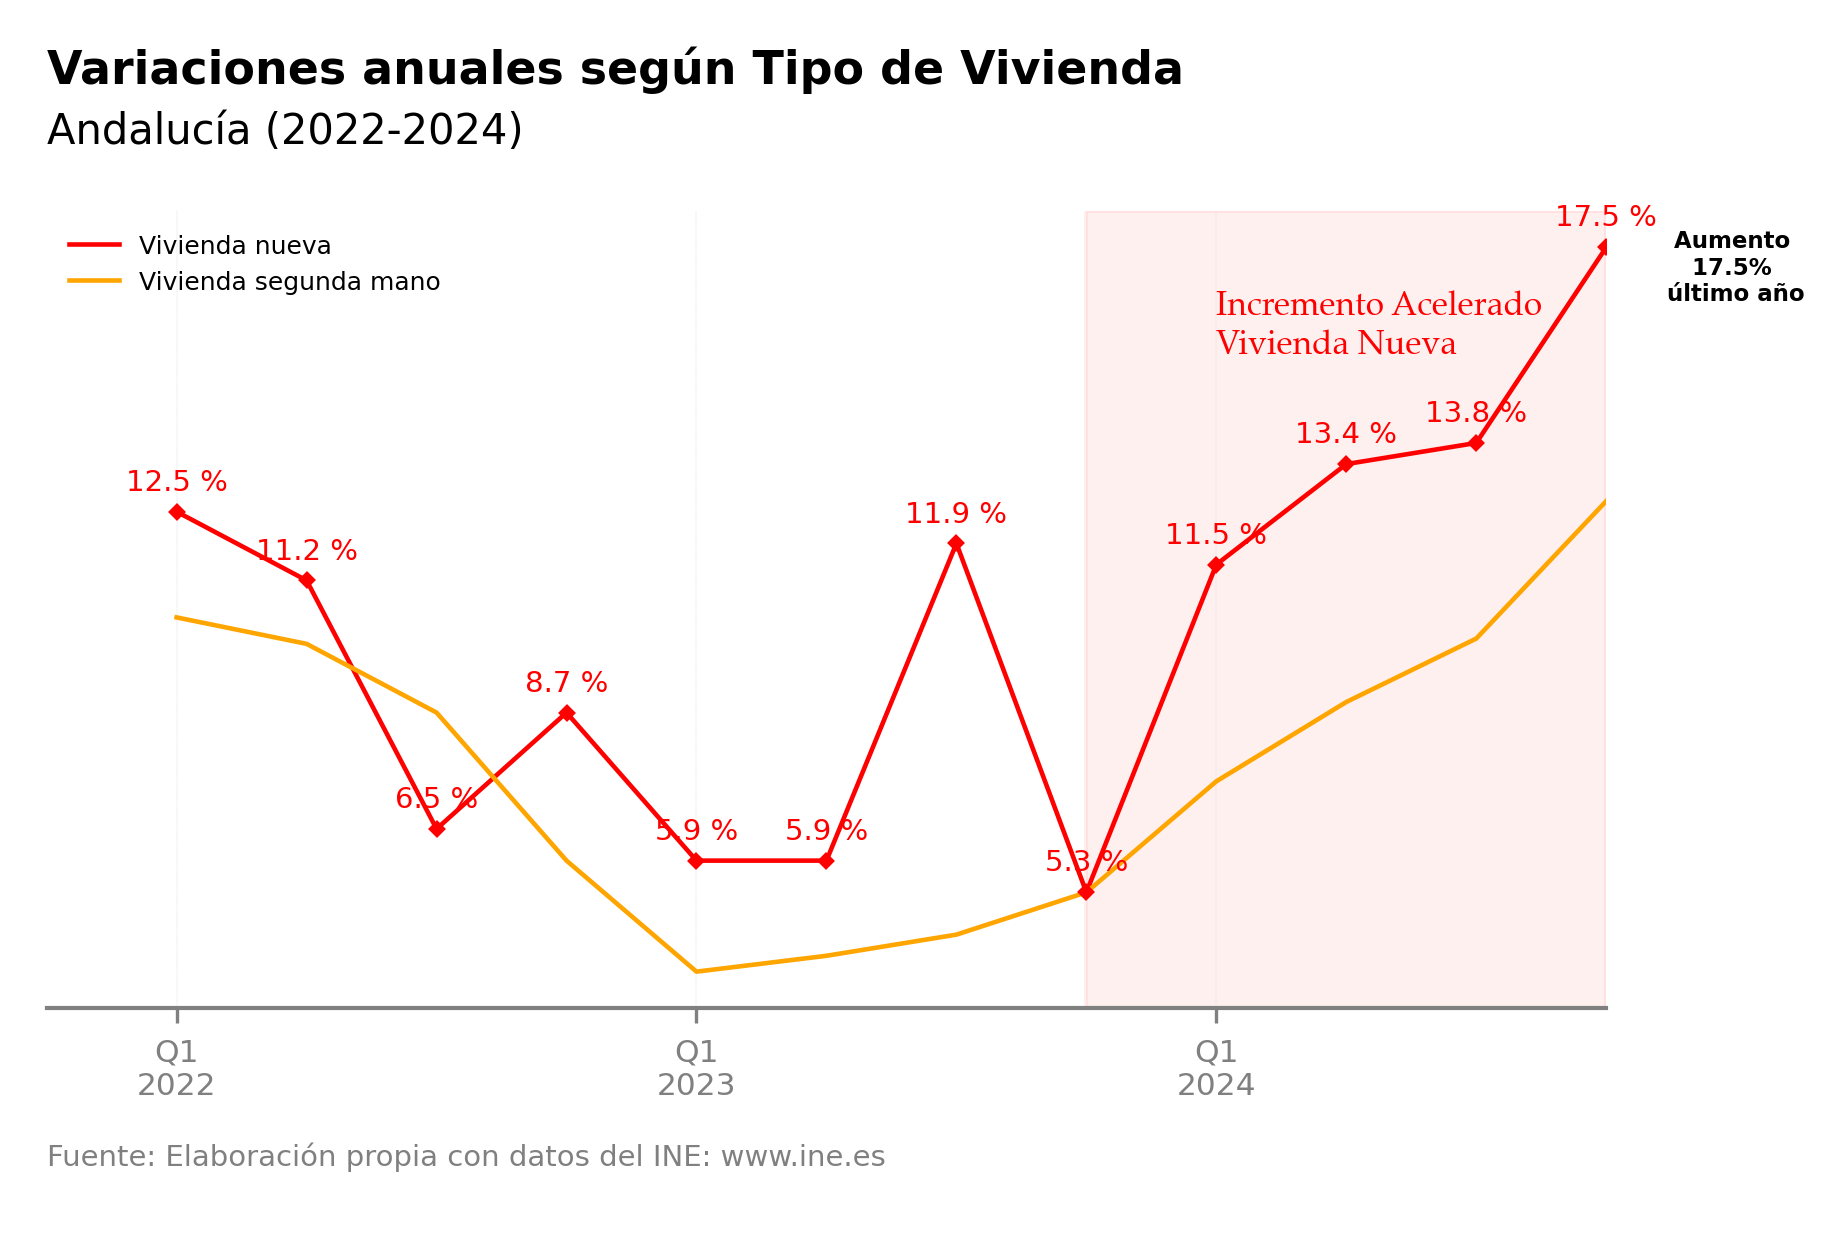

In [21]:
from highlight_text import ax_text

# Filtrar datos
data_plot_3 = data[(data.periodo >= '2022Q1') 
                    & (data.comunidades == 'Andalucía') 
                    & (data.índices_y_tasas == 'Variación anual') 
                    & (data.tipo_vivienda.isin(['Vivienda nueva', 'Vivienda segunda mano']))]

# Configurar layout
layout3 = [['title'], ['plot'], ['notes']]
fig3, axs3 = plt.subplot_mosaic(layout3, figsize=(6, 4), dpi=300, 
                                gridspec_kw={'height_ratios': [2, 12, 1]}, 
                                constrained_layout=True)

# ----- TÍTULO -----
ax_title3 = axs3['title']
ax_title3.axis('off')
ax_text(
    s='<Variaciones anuales según Tipo de Vivienda>\n<Andalucía (2022-2024)>',
    x=0, y=1, fontsize=10, ax=ax_title3, va='top', ha='left',
    highlight_textprops=[{'fontsize': heading_fontsize, 'fontweight': heading_fontweight},
                         {'fontsize': subheading_fontsize, 'fontweight': subheading_fontweight}]
)


# ----- GRÁFICO -----
ax_plot3 = axs3['plot']

# Graficar líneas según tipo de vivienda
housing_type = data_plot_3.pivot_table(index='periodo', 
                                       columns='tipo_vivienda', 
                                       values='total')
housing_type.plot(ax=ax_plot3, linewidth=1.1, 
                  color={'Vivienda nueva': 'red', 'Vivienda segunda mano': 'orange'})

# Graficar valores en la línea
ax_plot3.plot(housing_type.index, 
              housing_type['Vivienda nueva'].values, 'D', 
              color='red', markersize=2)
# Agregar las etiquetas de texto en los puntos correspondientes
for x, y in zip(housing_type.index, housing_type['Vivienda nueva'].values):
    ax_plot3.text(x, y + 0.3, f'{y} %', fontsize=7, 
                  color='red', ha='center', va='bottom')

# Sombrear periodo de comienzo de aumento creciente de la vivienda nueva
ax_plot3.axvspan('2023Q4', '2024Q4', color='red', alpha=0.06)
ax_plot3.text(x=dt(2024, 1, 1), y=15.5, 
              s='Incremento Acelerado \nVivienda Nueva', 
              fontsize=8, color='red', fontfamily='palatino')

# Agregar texto
ax_plot3.text(x=dt(2025, 1, 1), y=16.5, 
              s='Aumento \n17.5% \núltimo año', fontsize=5.5, 
              color='black', fontweight='bold', ha='center')

# Personalizar ejes
ax_plot3.set_xlabel('')
ax_plot3.set_xlim('2021Q4', '2024Q4')
ax_plot3.set_yticks([])
ax_plot3.minorticks_off()
ax_plot3.tick_params(axis='x', colors='gray', labelsize=7.5)
[ax_plot3.spines[side].set_visible(False) for side in ['top', 'right', 'left']]
ax_plot3.spines[['bottom', 'left']].set_color('gray')
ax_plot3.spines[['bottom', 'left']].set_linewidth(1)

# Agregar líneas de la grilla al eje x
ax_plot3.grid(which='major', axis='x', 
              linestyle='--', color='lightgray', linewidth=0.1)


# ----- FUENTE -----
ax_notes3 = axs3['notes']
ax_notes3.axis('off')
ax_text(s='Fuente: Elaboración propia con datos del INE: www.ine.es', 
        x=0, y=.5, fontsize=source_fontsize, fontweight=source_fontweight, 
        ax=ax_notes3, ha='left', va='bottom', color='gray')


# Agregar leyenda y mostrar gráfico
ax_plot3.legend(fontsize=6, loc='upper left', frameon=False)
plt.show()